## PROJECT 1: ANALYZING DATA

## ----------------------------------------------------------------------------------------------

## Angela Spirou's Analysis

## ----------------------------------------------------------------------------------------------

In [2]:
# Import Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, ttest_ind

In [3]:
# Create a reference the CSV file desired
csv_path = "csv_references/clean_nat_gen_renamed.csv"

# Read the CSV into a Pandas DataFrame
clean_nat_gen_renamed = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
clean_nat_gen_renamed.head()

,Gender,Percentile,Year,Life Expectancy Adjusted
0,F,1,2001,79.893463
1,F,1,2002,79.410622
2,F,1,2003,79.572174
3,F,1,2004,80.092476
4,F,1,2005,80.465935


In [4]:
# Create dfs for both males and females
nat_f = clean_nat_gen_renamed.loc[clean_nat_gen_renamed["Gender"] == "F"]
nat_m = clean_nat_gen_renamed.loc[clean_nat_gen_renamed["Gender"] == "M"]

In [5]:
# Gain average life expectancy per year per gender
nat_f_avg = nat_f.groupby(["Year"]).mean()["Life Expectancy Adjusted"]
nat_f_avg

Year
2001    84.123293
2002    84.422436
2003    84.553474
2004    84.888545
2005    85.120959
2006    85.350778
2007    85.779769
2008    85.954438
2009    85.855385
2010    86.124832
2011    86.262001
2012    86.258260
2013    86.316370
2014    86.549149
Name: Life Expectancy Adjusted, dtype: float64

In [6]:
nat_m_avg = nat_m.groupby(["Year"]).mean()["Life Expectancy Adjusted"]
nat_m_avg

Year
2001    80.754288
2002    80.726148
2003    80.913683
2004    81.317760
2005    81.554713
2006    81.781294
2007    82.109650
2008    82.066193
2009    82.078059
2010    82.324108
2011    82.407611
2012    82.229739
2013    82.342400
2014    82.669289
Name: Life Expectancy Adjusted, dtype: float64

In [7]:
# t-test to look at statistical differences between genders
(t_stat, p) = ttest_ind(nat_f_avg, nat_m_avg, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is 13.641185720203596.
p-value is 4.4270493407937153e-13.


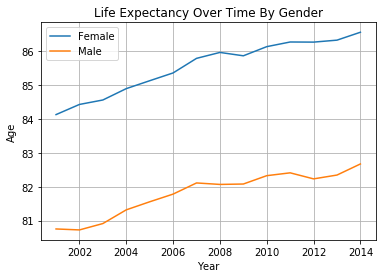

In [8]:
# Create line graph
nat_f_avg, = plt.plot(nat_f_avg, label="Female")
nat_m_avg, = plt.plot(nat_m_avg, label = "Male")

plt.title("Life Expectancy Over Time By Gender")
plt.xlabel("Year")
plt.ylabel("Age")
plt.grid(True)
plt.legend()

# Save line graph as .png
plt.savefig("chart_images/nat_gen_fig.png")

plt.show()

## ----------------------------------------------------------------------------------------------

## Lauren Gama's Analysis

## ----------------------------------------------------------------------------------------------

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Name of the CSV file
csv_path = 'csv_references/nat_gen_inc.csv'

# create df
nat_gen_inc = pd.read_csv(csv_path)

# Preview of the DataFrame
nat_gen_inc.head()

,gnd,pctile,year,le_raceadj,quartiles
0,F,1,2001,79.893463,Q1
1,F,1,2002,79.410622,Q1
2,F,1,2003,79.572174,Q1
3,F,1,2004,80.092476,Q1
4,F,1,2005,80.465935,Q1


In [10]:
# create dataframes for income quartiles
nat_gen_q1_df = nat_gen_inc.loc[nat_gen_inc["quartiles"] == "Q1"]
nat_gen_q2_df = nat_gen_inc.loc[nat_gen_inc["quartiles"] == "Q2"]
nat_gen_q3_df = nat_gen_inc.loc[nat_gen_inc["quartiles"] == "Q3"]
nat_gen_q4_df = nat_gen_inc.loc[nat_gen_inc["quartiles"] == "Q4"]

In [11]:
# group life expectancy by year
nat_gen_q1 = nat_gen_q1_df.groupby('year').mean()['le_raceadj']
nat_gen_q2 = nat_gen_q2_df.groupby('year').mean()['le_raceadj']
nat_gen_q3 = nat_gen_q3_df.groupby('year').mean()['le_raceadj']
nat_gen_q4 = nat_gen_q4_df.groupby('year').mean()['le_raceadj']

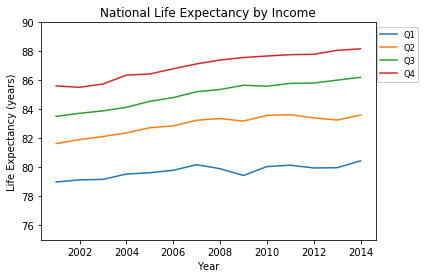

In [12]:
# plot LE by year & income
nat_gen_q1_plt, = plt.plot(nat_gen_q1, label="Q1")
nat_gen_q2_plt, = plt.plot(nat_gen_q2, label="Q2")
nat_gen_q3_plt, = plt.plot(nat_gen_q3, label="Q3")
nat_gen_q4_plt, = plt.plot(nat_gen_q4, label="Q4")

plt.title("National Life Expectancy by Income")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")

plt.ylim(75,90)

legend = plt.legend(handles=[nat_gen_q1_plt, nat_gen_q2_plt, nat_gen_q3_plt, nat_gen_q4_plt], 
                    fontsize="small", framealpha=1, bbox_to_anchor=(.99, 1), loc='upper left')

plt.savefig("chart_images/LE by Income.png")

plt.show()

In [13]:
# create dataframes for female income quartiles
nat_f_q1_df = nat_gen_q1_df.loc[nat_gen_q1_df["gnd"] == "F"]
nat_f_q2_df = nat_gen_q2_df.loc[nat_gen_q2_df["gnd"] == "F"]
nat_f_q3_df = nat_gen_q3_df.loc[nat_gen_q3_df["gnd"] == "F"]
nat_f_q4_df = nat_gen_q4_df.loc[nat_gen_q4_df["gnd"] == "F"]

In [14]:
# group female LE by year
nat_f_q1 = nat_f_q1_df.groupby('year').mean()['le_raceadj']
nat_f_q2 = nat_f_q2_df.groupby('year').mean()['le_raceadj']
nat_f_q3 = nat_f_q3_df.groupby('year').mean()['le_raceadj']
nat_f_q4 = nat_f_q4_df.groupby('year').mean()['le_raceadj']

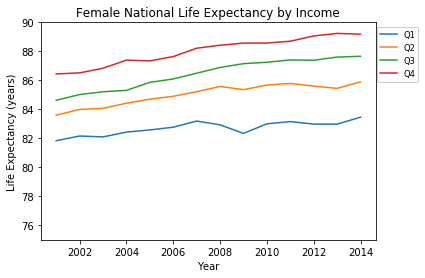

In [15]:
# plot female LE by year & income
nat_f_q1_plt, = plt.plot(nat_f_q1, label="Q1")
nat_f_q2_plt, = plt.plot(nat_f_q2, label="Q2")
nat_f_q3_plt, = plt.plot(nat_f_q3, label="Q3")
nat_f_q4_plt, = plt.plot(nat_f_q4, label="Q4")

plt.title("Female National Life Expectancy by Income")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")

plt.ylim(75,90)

legend = plt.legend(handles=[nat_f_q1_plt, nat_f_q2_plt, nat_f_q3_plt, nat_f_q4_plt], 
                    fontsize="small", framealpha=1, bbox_to_anchor=(.99, 1), loc='upper left')

plt.savefig("chart_images/Female LE by Income.png")

plt.show()

In [16]:
# create dataframes for male income quartiles
nat_m_q1_df = nat_gen_q1_df.loc[nat_gen_q1_df["gnd"] == "M"]
nat_m_q2_df = nat_gen_q2_df.loc[nat_gen_q2_df["gnd"] == "M"]
nat_m_q3_df = nat_gen_q3_df.loc[nat_gen_q3_df["gnd"] == "M"]
nat_m_q4_df = nat_gen_q4_df.loc[nat_gen_q4_df["gnd"] == "M"]

In [17]:
# group male LE by year
nat_m_q1 = nat_m_q1_df.groupby('year').mean()['le_raceadj']
nat_m_q2 = nat_m_q2_df.groupby('year').mean()['le_raceadj']
nat_m_q3 = nat_m_q3_df.groupby('year').mean()['le_raceadj']
nat_m_q4 = nat_m_q4_df.groupby('year').mean()['le_raceadj']

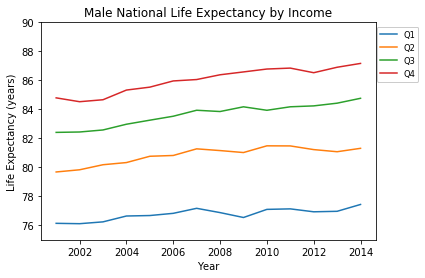

In [18]:
# plot male LE by year & income
nat_m_q1_plt, = plt.plot(nat_m_q1, label="Q1")
nat_m_q2_plt, = plt.plot(nat_m_q2, label="Q2")
nat_m_q3_plt, = plt.plot(nat_m_q3, label="Q3")
nat_m_q4_plt, = plt.plot(nat_m_q4, label="Q4")

plt.title("Male National Life Expectancy by Income")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")

plt.ylim(75,90)

legend = plt.legend(handles=[nat_m_q1_plt, nat_m_q2_plt, nat_m_q3_plt, nat_m_q4_plt], 
                    fontsize="small", framealpha=1, bbox_to_anchor=(.99, 1), loc='upper left')

plt.savefig("chart_images/Male LE by Income.png")

plt.show()

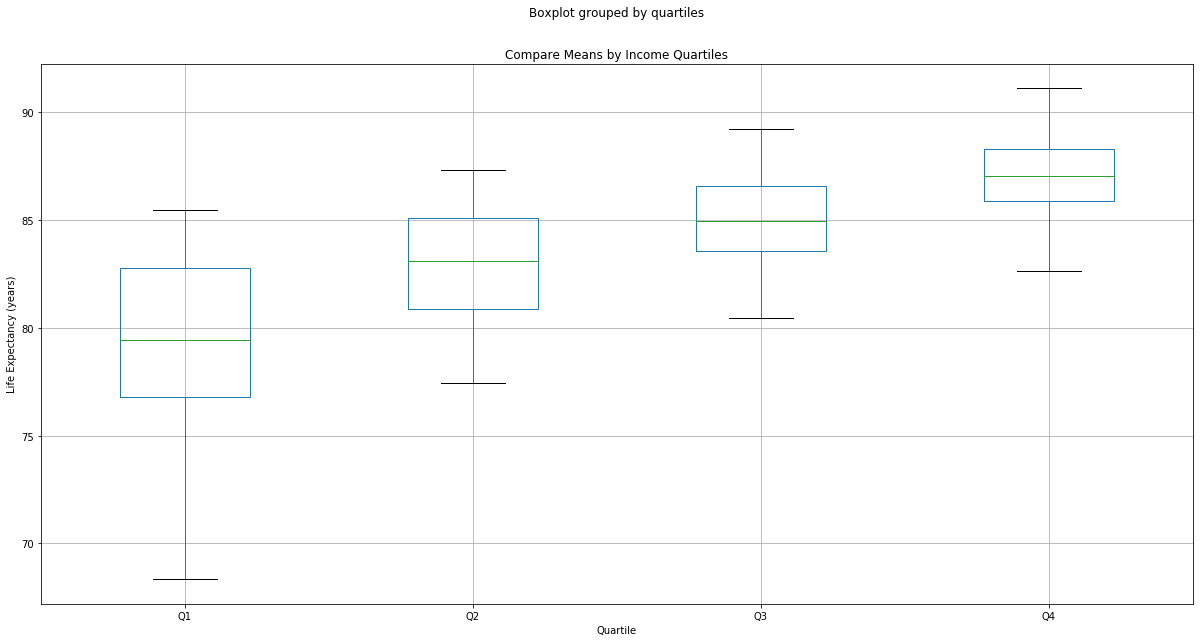

In [19]:
# Create a boxplot to compare means INCOMES F&M
nat_gen_inc.boxplot("le_raceadj", by="quartiles", figsize=(20, 10))

plt.title("Compare Means by Income Quartiles")
plt.xlabel("Quartile")
plt.ylabel("Life Expectancy (years)")

plt.savefig("chart_images/Income ANOVA.png")

In [20]:
# Extract individual groups
groupQ1 = nat_gen_inc[nat_gen_inc["quartiles"] == "Q1"]["le_raceadj"]
groupQ2 = nat_gen_inc[nat_gen_inc["quartiles"] == "Q2"]["le_raceadj"]
groupQ3 = nat_gen_inc[nat_gen_inc["quartiles"] == "Q3"]["le_raceadj"]
groupQ4 = nat_gen_inc[nat_gen_inc["quartiles"] == "Q4"]["le_raceadj"]

In [21]:
# Perform the ANOVA
stats.f_oneway(groupQ1, groupQ2, groupQ3, groupQ4)

F_onewayResult(statistic=1181.1832194781289, pvalue=0.0)

In [22]:
# Extract individual groups
groupFQ1 = nat_f_q1_df["le_raceadj"]
groupMQ1 = nat_m_q1_df["le_raceadj"]

In [23]:
stats.ttest_ind(groupFQ1, groupMQ1, equal_var=False)

Ttest_indResult(statistic=56.18424611704008, pvalue=7.190316269820512e-258)

In [24]:
# Extract individual groups
groupFQ4 = nat_f_q4_df["le_raceadj"]
groupMQ4 = nat_m_q4_df["le_raceadj"]

In [25]:
stats.ttest_ind(groupFQ4, groupMQ4, equal_var=False)

Ttest_indResult(statistic=19.654905493994956, pvalue=1.0478626117207194e-68)

## ----------------------------------------------------------------------------------------------

## Kevin Menz's Analysis

## ----------------------------------------------------------------------------------------------

In [26]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv = 'csv_references/state_averages_cleaned.csv'

In [27]:
#Read CSV Into DF
states_average_df = pd.read_csv('csv_references/state_averages_cleaned.csv')
states_average_df.head()

,Abbrv,State,LE Q1 F,LE Q2 F,LE Q3 F,LE Q4 F,LE Q1 M,LE Q2 M,LE Q3 M,LE Q4 M,Female Average,Male Average,Q1 Average,Q2 Average,Q3 Average,Q4 Average,State Average
0,AL,Alabama,82.228058,84.474808,85.808136,87.224434,75.376083,79.430519,82.262962,84.497810,84.933859,80.391844,78.802070,81.952663,84.035549,85.861122,82.662851
1,AK,Alaska,82.348953,83.712013,85.585838,87.168770,76.639389,80.524376,82.445099,85.575829,84.703893,81.296173,79.494171,82.118195,84.015469,86.372299,83.000033
2,AZ,Arizona,82.151314,84.147186,85.781685,87.435135,77.007629,80.474632,82.700462,85.230026,84.878830,81.353187,79.579472,82.310909,84.241073,86.332581,83.116009
3,AR,Arkansas,81.310768,84.123650,85.637344,87.601463,75.763702,79.606911,82.115067,84.158447,84.668306,80.411032,78.537235,81.865281,83.876206,85.879955,82.539669
4,CA,California,82.946465,83.530724,84.965134,86.939842,78.731621,80.364868,82.369225,85.161736,84.595541,81.656863,80.839043,81.947796,83.667180,86.050789,83.126202


In [28]:
#Get Top 5 Male Averages
Male_Average_Top = states_average_df.sort_values('Male Average', ascending = False).reset_index()

Male_Average_Top = Male_Average_Top.head()

In [29]:
#create variables for bar chart for male average
x_axis = np.arange(len(Male_Average_Top['State']))
m_avg = Male_Average_Top['Male Average']
f_avg = Male_Average_Top['Female Average']

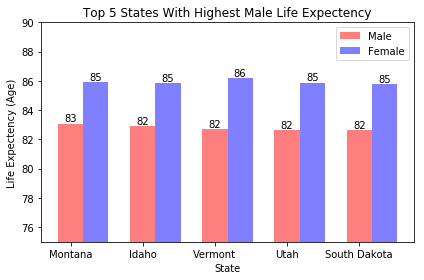

In [30]:
#Define Subplots and Bar Width For Top Male LE
fig, ax = plt.subplots()
bar_width = .35

#Build Bar Chart For Top Male LE
Top_Men_M = ax.bar(x_axis, m_avg, bar_width, color = 'r', alpha = .5, label = 'Male')
Top_Men_F = ax.bar(x_axis + bar_width, f_avg, bar_width, color = 'b', alpha = .5, label = 'Female')

#Build Tick Locations for Top Male LE
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Male_Average_Top['State'] )

#Set Limits and add in labels for Top Male LE
plt.ylim(75, 90)
plt.title('Top 5 States With Highest Male Life Expectency')
plt.xlabel('State')
plt.ylabel('Life Expectency (Age)')
plt.legend()

#Create function for data labels
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % float(height),
                ha='center', va='bottom')

autolabel(Top_Men_M)
autolabel(Top_Men_F)


#Final Touches
fig.tight_layout()

plt.savefig('chart_images/state_top_male.png')

plt.show()

In [51]:
#Get Top 5 Female Averages
Female_Average_Top = states_average_df.sort_values('Female Average', ascending = False).reset_index()

Female_Average_Top = Female_Average_Top.head()

In [52]:
#create variables for bar chart for female average
x_axis = np.arange(len(Female_Average_Top['State']))
m_avg = Female_Average_Top['Male Average']
f_avg = Female_Average_Top['Female Average']

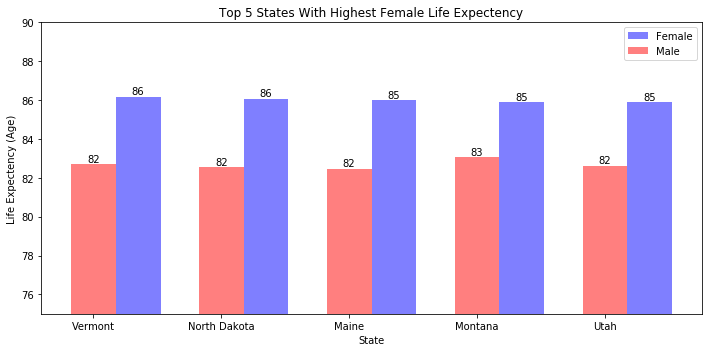

In [53]:
#Define Subplots and Bar Width For Top Female LE
fig, ax = plt.subplots()
bar_width = .35

#Build Bar Chart For Top Female LE
Top_Fem_F = ax.bar(x_axis + bar_width, f_avg, bar_width, color = 'b', alpha = .5, label = 'Female')
Top_Fem_M = ax.bar(x_axis, m_avg, bar_width, color = 'r', alpha = .5, label = 'Male')


#Build Tick Locations for Top Female LE
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Female_Average_Top['State'] )

#Set Limits and add in labels for Top Female LE
plt.ylim(75, 90)
plt.title('Top 5 States With Highest Female Life Expectency')
plt.xlabel('State')
plt.ylabel('Life Expectency (Age)')
plt.legend()

#Create function for data labels
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % float(height),
                ha='center', va='bottom')

autolabel(Top_Fem_M)
autolabel(Top_Fem_F)


#Final Touches
fig.tight_layout()

plt.savefig('chart_images/state_top_female.png')

plt.show()

In [54]:
#Get Bottom 5 Male Averages
Male_Average_Bot = states_average_df.sort_values('Male Average', ascending = True).reset_index()

Male_Average_Bot = Male_Average_Bot.head()

In [55]:
#create variables for bar chart for male average
x_axis = np.arange(len(Male_Average_Bot['State']))
m_avg = Male_Average_Bot['Male Average']
f_avg = Male_Average_Bot['Female Average']

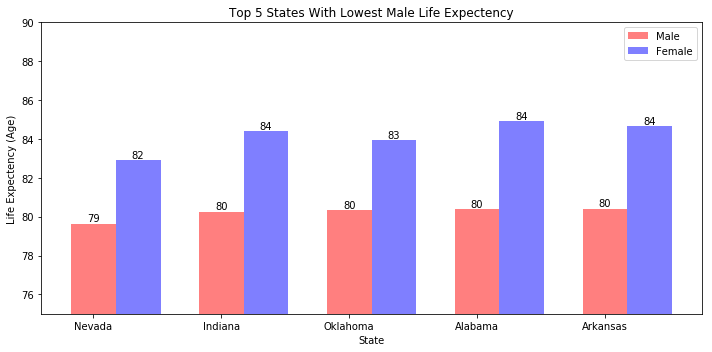

In [56]:
#Define Subplots and Bar Width For Bot Male LE
fig, ax = plt.subplots()
bar_width = .35

#Build Bar Chart For Bot Male LE
Bot_Men_M = ax.bar(x_axis, m_avg, bar_width, color = 'r', alpha = .5, label = 'Male')
Bot_Men_F = ax.bar(x_axis + bar_width, f_avg, bar_width, color = 'b', alpha = .5, label = 'Female')

#Build Tick Locations for Bot Male LE
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Male_Average_Bot['State'] )

#Set Limits and add in labels for Bot Male LE
plt.ylim(75, 90)
plt.title('Top 5 States With Lowest Male Life Expectency')
plt.xlabel('State')
plt.ylabel('Life Expectency (Age)')
plt.legend()

#Create function for data labels
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % float(height),
                ha='center', va='bottom')
        
autolabel(Bot_Men_M)
autolabel(Bot_Men_F)

#Final Touches
fig.tight_layout()

plt.savefig('chart_images/state_bot_male.png')

plt.show()

In [57]:
#Get Bottom 5 Female Averages
Female_Average_Bot = states_average_df.sort_values('Female Average', ascending = True).reset_index()

Female_Average_Bot = Female_Average_Bot.head()

In [58]:
#create variables for bar chart for female average
x_axis = np.arange(len(Female_Average_Bot['State']))
m_avg = Female_Average_Bot['Male Average']
f_avg = Female_Average_Bot['Female Average']

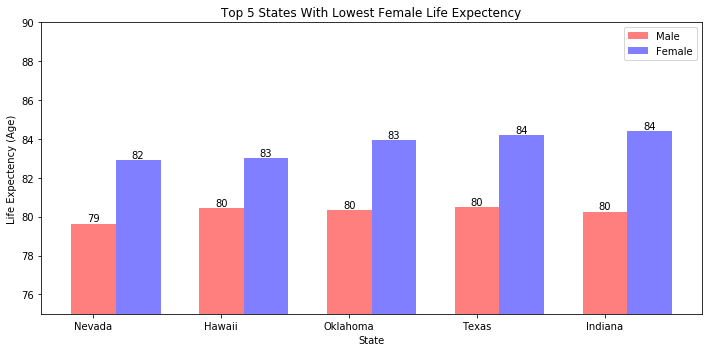

In [59]:
#Define Subplots and Bar Width For Bot female LE
fig, ax = plt.subplots()
bar_width = .35

#Build Bar Chart For Bot female LE
Bot_Fem_M = ax.bar(x_axis, m_avg, bar_width, color = 'r', alpha = .5, label = 'Male')
Bot_Fem_F = ax.bar(x_axis + bar_width, f_avg, bar_width, color = 'b', alpha = .5, label = 'Female')

#Build Tick Locations for Bot female LE
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Female_Average_Bot['State'] )

#Set Limits and add in labels for Bot female LE
plt.ylim(75, 90)
plt.title('Top 5 States With Lowest Female Life Expectency')
plt.xlabel('State')
plt.ylabel('Life Expectency (Age)')
plt.legend()

#Create function for data labels
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % float(height),
                ha='center', va='bottom')
        
autolabel(Bot_Fem_M)
autolabel(Bot_Fem_F)


#Final Touches
fig.tight_layout()

plt.savefig('chart_images/state_bot_female.png')

plt.show()

## ----------------------------------------------------------------------------------------------

## Myke London's Analysis

## ----------------------------------------------------------------------------------------------

In [40]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = 10,5

In [41]:
# The path to our CSV file
csv = "csv_references/State_Characteristics.csv"
csv2 = "csv_references/state_averages_cleaned.csv"

# Read our purchase data into pandas
statesummaries_df = pd.read_csv(csv)
stateaverages_df = pd.read_csv(csv2)
# statesummaries_df.head()
# stateaverages_df.head()
stateaverages_df = stateaverages_df.rename(columns = {'Abbrv': 'State Abbreviation'})
stateaverages_df.head()

,State Abbreviation,State,LE Q1 F,LE Q2 F,LE Q3 F,LE Q4 F,LE Q1 M,LE Q2 M,LE Q3 M,LE Q4 M,Female Average,Male Average,Q1 Average,Q2 Average,Q3 Average,Q4 Average,State Average
0,AL,Alabama,82.228058,84.474808,85.808136,87.224434,75.376083,79.430519,82.262962,84.497810,84.933859,80.391844,78.802070,81.952663,84.035549,85.861122,82.662851
1,AK,Alaska,82.348953,83.712013,85.585838,87.168770,76.639389,80.524376,82.445099,85.575829,84.703893,81.296173,79.494171,82.118195,84.015469,86.372299,83.000033
2,AZ,Arizona,82.151314,84.147186,85.781685,87.435135,77.007629,80.474632,82.700462,85.230026,84.878830,81.353187,79.579472,82.310909,84.241073,86.332581,83.116009
3,AR,Arkansas,81.310768,84.123650,85.637344,87.601463,75.763702,79.606911,82.115067,84.158447,84.668306,80.411032,78.537235,81.865281,83.876206,85.879955,82.539669
4,CA,California,82.946465,83.530724,84.965134,86.939842,78.731621,80.364868,82.369225,85.161736,84.595541,81.656863,80.839043,81.947796,83.667180,86.050789,83.126202


In [42]:
stateinfomerge_df=pd.merge(statesummaries_df,stateaverages_df, on="State Abbreviation")
stateinfomerge_df.head()

,State Abbreviation,Percent Uninsured,Percent of Medicare Enrollees with at Least One Primary Care Visit,Percent Black,Percent Hispanic,Mean Household Income,Median House Value,Percent College Grads,State,LE Q1 F,...,LE Q2 M,LE Q3 M,LE Q4 M,Female Average,Male Average,Q1 Average,Q2 Average,Q3 Average,Q4 Average,State Average
0,AK,20.810048,68.396118,3.370547,4.117386,39316.127927,189058.544520,20.810048,Alaska,82.348953,...,80.524376,82.445099,85.575829,84.703893,81.296173,79.494171,82.118195,84.015469,86.372299,83.000033
1,AL,17.025655,83.011464,25.861258,1.705156,33407.113797,113881.208651,17.025655,Alabama,82.228058,...,79.430519,82.262962,84.497810,84.933859,80.391844,78.802070,81.952663,84.035549,85.861122,82.662851
2,AR,20.627987,80.983545,15.583714,3.249271,31613.757775,95801.433543,20.627987,Arkansas,81.310768,...,79.606911,82.115067,84.158447,84.668306,80.411032,78.537235,81.865281,83.876206,85.879955,82.539669
3,AZ,19.313449,79.607123,2.922467,25.252582,37996.247733,159287.376412,19.313449,Arizona,82.151314,...,80.474632,82.700462,85.230026,84.878830,81.353187,79.579472,82.310909,84.241073,86.332581,83.116009
4,CA,20.643943,72.221846,6.441747,32.376801,41101.182974,303544.618008,20.643943,California,82.946465,...,80.364868,82.369225,85.161736,84.595541,81.656863,80.839043,81.947796,83.667180,86.050789,83.126202


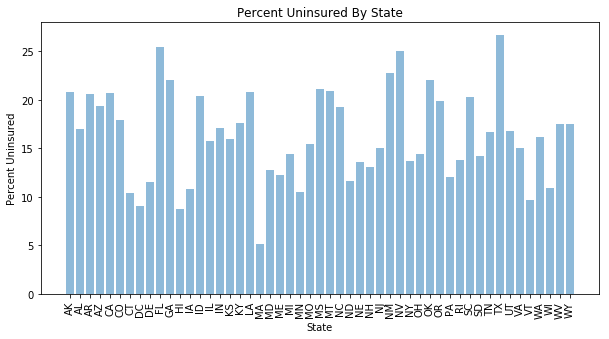

In [43]:
# Create a bar chart based off of the group series from before
x_axis = np.arange(len(statesummaries_df['State Abbreviation']))

plt.bar(x_axis, statesummaries_df["Percent Uninsured"], alpha=0.5, align="center") 

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, statesummaries_df['State Abbreviation'], rotation="vertical")

plt.title("Percent Uninsured By State")
plt.xlabel("State")
plt.ylabel("Percent Uninsured")

plt.savefig('chart_images/Pct_unins_state_avg.png')

# plt.figure(figsize=(20,10))
plt.show()

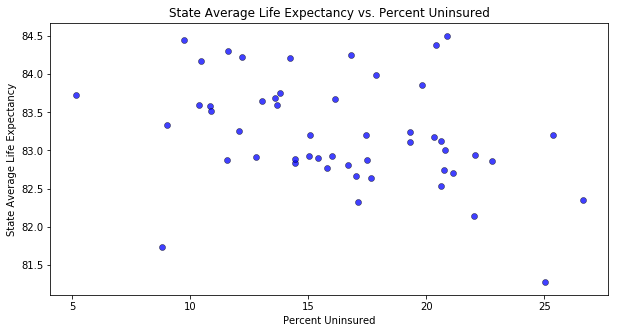

In [44]:
PU=plt.scatter(stateinfomerge_df["Percent Uninsured"], stateinfomerge_df["State Average"], c="blue",edgecolor="black", 
                  linewidths=.5, alpha=.75, label="State Average")

plt.xlabel("Percent Uninsured")
plt.ylabel("State Average Life Expectancy")
plt.title("State Average Life Expectancy vs. Percent Uninsured")

plt.savefig('chart_images/State_avg_pct_uninsured.png')
# plt.trendline()

In [45]:
scipy.stats.pearsonr(stateinfomerge_df["Percent Uninsured"], stateinfomerge_df["State Average"])

(-0.36478351540434856, 0.008491792016149613)

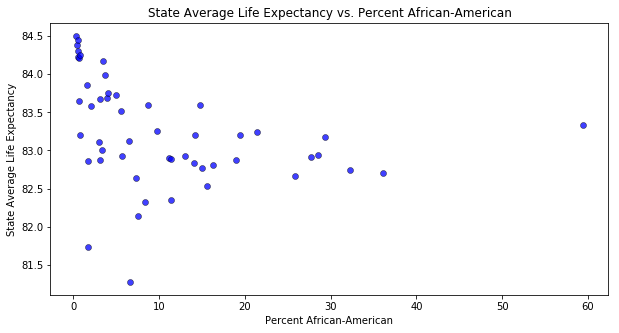

In [46]:
Hispanic=plt.scatter(stateinfomerge_df["Percent Black"], stateinfomerge_df["State Average"], c="blue",edgecolor="black", 
                  linewidths=.5, alpha=.75, label="Male")

plt.xlabel("Percent African-American")
plt.ylabel("State Average Life Expectancy")
plt.title("State Average Life Expectancy vs. Percent African-American")

plt.savefig('chart_images/Pct_AA_state_avg.png')
# plt.trendline()

In [47]:
scipy.stats.pearsonr(stateinfomerge_df["Percent Black"], stateinfomerge_df["State Average"])

(-0.32034333619614225, 0.021919807870853156)

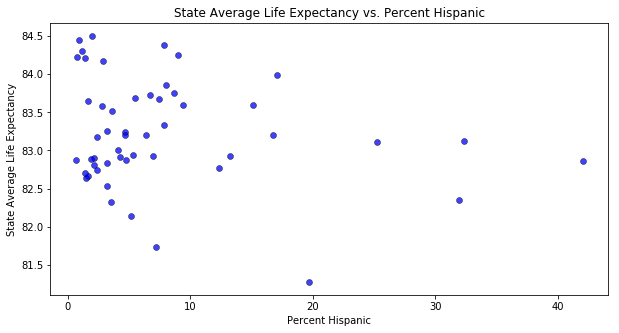

In [48]:
Hispanic=plt.scatter(stateinfomerge_df["Percent Hispanic"], stateinfomerge_df["State Average"], c="blue",edgecolor="black", 
                  linewidths=.5, alpha=.75, label="Male")

plt.xlabel("Percent Hispanic")
plt.ylabel("State Average Life Expectancy")
plt.title("State Average Life Expectancy vs. Percent Hispanic")

plt.savefig('chart_images/Pct_hispanic_state_avg.png')
# plt.trendline()

In [49]:
scipy.stats.pearsonr(stateinfomerge_df["Percent Hispanic"], stateinfomerge_df["State Average"])

(-0.20427612810645301, 0.15047113551257532)

## ----------------------------------------------------------------------------------------------

## Conor Healy's Analysis

## ----------------------------------------------------------------------------------------------

In [3]:
from config import gkey
import gmaps
import requests
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
hospital = "./csv_references/hospitaldf.csv"
hospital_df = pd.read_csv(hospital)

In [5]:
gmaps.configure(api_key=gkey)

In [6]:
hospital_rate = hospital_df["Name"].tolist()

locations = hospital_df[["Latitude", "Longitude"]].astype(float)

In [7]:
hospital_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Hospital name: {Name}" for Name in hospital_rate]
)


fig = gmaps.figure()
fig.add_layer(hospital_layer)

In [8]:
combined = "./csv_references/final_zip.csv"
heat_df = pd.read_csv(combined)

df2 = heat_df.set_index("County Name")
df3 = df2[df2["IMU Score"] < 60]

In [9]:
locations = df3[["Lat", "Lng"]].astype('float64')

IMU_rate = df3["IMU Score"].astype('float64')

In [10]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=IMU_rate, 
                                 dissipating=False, max_intensity=60,
                                 point_radius = .3)


heat_layer.dissipating = False
heat_layer.max_intensity = 60
heat_layer.point_radius = .3

fig.add_layer(heat_layer)



In [11]:
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(hospital_layer)